In [347]:
import networkx as nx
from networkx.algorithms import bipartite
from networkx.drawing.layout import bipartite_layout
import matplotlib.pyplot as plt
from networkx.classes.function import density
from networkx.algorithms.bipartite import degree_centrality, closeness_centrality, betweenness_centrality
from networkx.algorithms.components import connected_components
from networkx.algorithms.link_analysis.pagerank_alg import pagerank
from networkx.algorithms import distance_measures
from networkx.algorithms.cluster import clustering
from sklearn.preprocessing import MinMaxScaler
import operator
import csv

In [311]:
import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=-1, vmax=1)

In [312]:
def normaliza(vetor, min_max):
    vetor_scaled = []
    menor = min(vetor)
    maior = max(vetor)
    for i in range(len(vetor)):
        vetor[i] = (vetor[i] - menor) / (maior - menor)
        scaled = vetor[i] * (min_max[1] - min_max[0]) + min_max[0]
        vetor_scaled.append(round(scaled,1))
    return vetor_scaled

In [326]:
G = nx.Graph()
node_0 = []
node_1 = []

# Ler o arquivo e separa os nós em duas listas
with open("Ppgia Dataset - tratado.csv", 'r', encoding='utf-8') as file:
    arquivo = csv.reader(file)
    for linha in arquivo:
        node_0.append(linha[0])
        node_1.append(linha[1])
        
# Adiciona os nós do grafo bipartido
G.add_nodes_from(node_0, bipartite=0)
G.add_nodes_from(node_1, bipartite=1)

# Gera as arestas do grafo
for i in range(len(node_0)):
    G.add_edge(node_0[i],node_1[i])

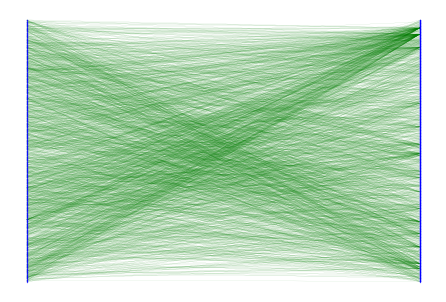

In [327]:
# Apresenta o gráfico em layout bipartido
tit = nx.bipartite.sets(G)[0] #Títulos
aut = nx.bipartite.sets(G)[1] #Autores
pos = nx.bipartite_layout(G, tit)
nx.draw(G, pos, node_size=0.1, node_color='b', edge_color='g', width=0.05)

#### Graus dos Nós - Autores

In [5]:
# Graus dos nós autores - Ordenados decrescente
graus_aut, graus_tit = bipartite.degrees(G,tit)
graus_autores = dict(graus_aut)
sorted(graus_autores.items(), key=lambda x: x[1], reverse=True)

[('Victor Hugo Costa De Albuquerque', 166),
 ('Plácido Rogério Pinheiro', 123),
 ('Joao Jose Vasco Peixoto Furtado', 44),
 ('Joel J P C Rodrigues', 41),
 ('Maria Elizabeth Sucupira Furtado', 40),
 ('Maria Andréia Formico Rodrigues', 36),
 ('J M R S Tavares', 30),
 ('André Luís Vasconcelos Coelho', 29),
 ('Adriano Bessa Albuquerque', 28),
 ('Pedro Pedrosa Reboucas Filho', 27),
 ('João Batista Duarte Furlan', 26),
 ('Raimir Holanda Filho', 23),
 ('João Paulo Papa', 23),
 ('Nabor Das Chagas Mendonça', 20),
 ('Khan Muhammad', 19),
 ('Mirian Caliope Dantas Pinheiro', 15),
 ('Luís Henrique Pequeno Almeida', 14),
 ('Isabelle Tamanini', 13),
 ('Deepak Gupta', 12),
 ('João Manuel R S Tavares', 11),
 ('Ashish Khanna', 11),
 ('Napoleão Vieira Nepomuceno', 11),
 ('Vládia Célia Monteiro Pinheiro', 11),
 ('Pedro Pedrosa Rebouças Filho', 11),
 ('Roberto Munoz', 10),
 ('Thais Cristina Sampaio Machado', 10),
 ('Paulo César Cortez', 9),
 ('Tarcisio Haroldo Cavalcante Pequeno', 9),
 ('Wanqing Wu', 9),
 (

#### Graus dos Nós - Títulos

In [6]:
# Graus dos nós Títulos - Ordenados decrescente
graus_titulos = dict(graus_tit)
sorted(graus_titulos.items(), key=lambda x: x[1], reverse=True)

[('The Crosscutting Impact Of The Aosd Brazilian Research Community', 33),
 ('Cloud Computing And Reservoir Project', 23),
 ('Produzindo Biogás A Partir De Resíduos De Frutas Para Gerar Energia Elétrica',
  13),
 ('Fatores De Sucesso E Dificuldades Na Implementação De Processos De Software Utilizando O Mr-Mps E O Cmmi',
  10),
 ('Towards 5G-Enabled Self Adaptive Green And Reliable Communication In Intelligent Transportation System',
  10),
 ('Reducing The Schizophrenia Stigma: A New Approach Based On Augmented Reality',
  10),
 ('Hci Community In Brazil---Sweet 16!', 10),
 ('P1864Renal Health Mobile Application: An Analysis Of Its Use In Brazil',
  10),
 ('Enterprise-Oriented Software Development Environments To Support Software Products And Processes Quality Improvement',
  9),
 ('Salient Object Detection In The Distributed Cloud-Edge Intelligent Network',
  9),
 ('Effective Features To Classify Big Data Using Social Internet Of Things',
  9),
 ('Learning Physical Properties In Comple

#### Grafo Monopartido Ponderado

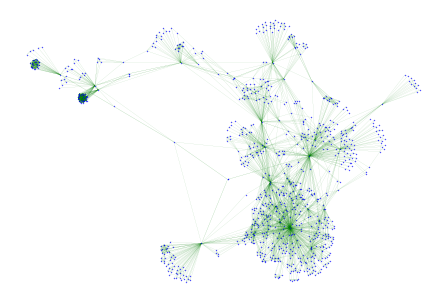

In [8]:
# Retorna o gráfico Gpa que é a projeção do gráfico bipartido G nos nós Autores.
Gpa = bipartite.projected_graph(G, aut)
nx.draw(Gp, node_size=0.1, node_color='b', edge_color='g', width=0.05)

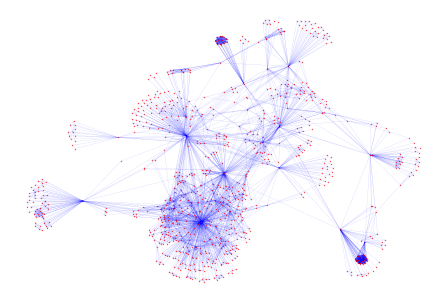

In [277]:
# Retorna o gráfico Gpt que é a projeção do gráfico bipartido G nos nós Títulos.
Gpt = bipartite.projected_graph(G, tit)
nx.draw(Gp, node_size=0.1, node_color='r', edge_color='b', width=0.05)

O grafo projetado ponderado é a projeção do grafo bipartida G nos nós especificados com pesos representando o número de vizinhos compartilhados ou a razão entre vizinhos compartilhados reais e possíveis vizinhos compartilhados se Ratio = True.

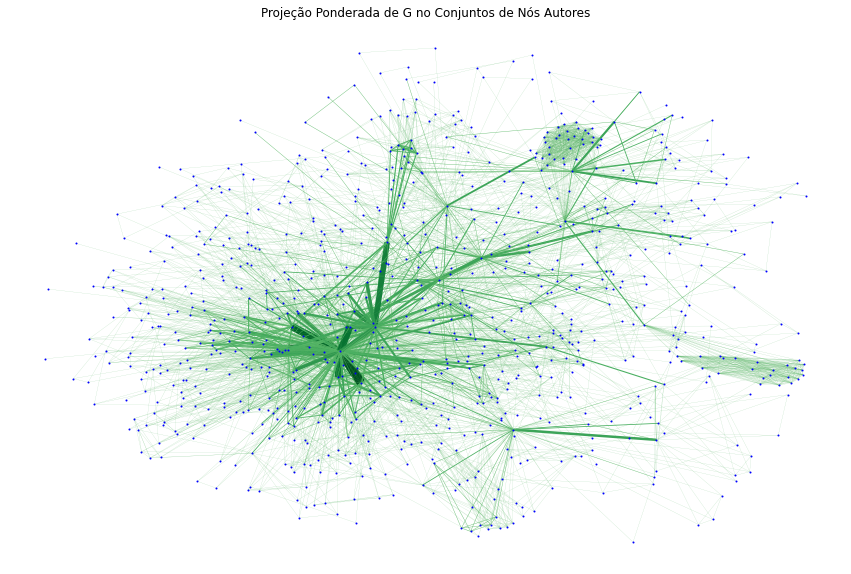

In [268]:
Gwa = bipartite.weighted_projected_graph(G, aut, ratio=True)
fig = plt.figure(figsize=(15,10))
plt.title('Projeção Ponderada de G no Conjuntos de Nós Autores')
pos = nx.spring_layout(Gwa)
edges,weights = zip(*nx.get_edge_attributes(Gwa,'weight').items())
edge_widths = normaliza(list(weights), (0.1,10))
edge_colors = normaliza(list(weights), (0.1,1))
nx.draw(Gwa, pos, node_size=1, node_color='b', edgelist=edges,
        edge_color=edge_colors, width=edge_widths, edge_cmap=plt.cm.Greens, edge_vmin=-1, edge_vmax=1)

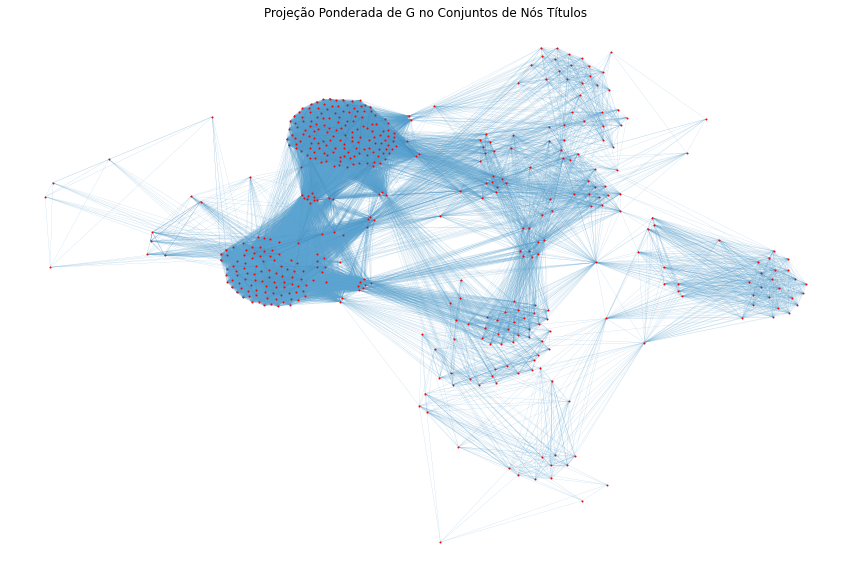

In [278]:
Gwt = bipartite.weighted_projected_graph(G, tit, ratio=True)
fig = plt.figure(figsize=(15,10))
plt.title('Projeção Ponderada de G no Conjuntos de Nós Títulos')
pos = nx.spring_layout(Gwt)
edges,weights = zip(*nx.get_edge_attributes(Gwt,'weight').items())
edge_widths = normaliza(list(weights), (0.1,0.3))
edge_colors = normaliza(list(weights), (0.1,1))
nx.draw(Gwt, pos, node_size=1, node_color='r', edgelist=edges,
        edge_color=edge_colors, width=edge_widths, edge_cmap=plt.cm.Blues, edge_vmin=-1, edge_vmax=1)

### Densidade

In [307]:
print(f'Densidade Nós Autores: {bipartite.density(G,aut)}')

Densidade Nós Autores: 0.005188379937310058


In [308]:
print(f'Densidade Nós Títulos: {bipartite.density(G,tit)}')

Densidade Nós Títulos: 0.005188379937310058


In [285]:
list(nx.isolates(G))

[]

In [300]:
def clustering_coef(G):
    print()
    print('Coeficiente de Agrupamento')
    print(f'Coeficiente Geral: {bipartite.average_clustering(G)}')
    print(f'Coeficiente Nós Autores: {bipartite.average_clustering(G, aut)}')
    print(f'Coeficiente Nós Títulos: {bipartite.average_clustering(G, tit)}')

In [359]:
def centralidade(G, nos):
    print()
    print('Centralidade de Grau')
    centralidade_grau = degree_centrality(G, nos)
    no_min = min(centralidade_grau.items(), key=operator.itemgetter(1))[0]
    no_max = max(centralidade_grau.items(), key=operator.itemgetter(1))[0]
    print(f'O Nó {no_min} tem mínima centralidade ({centralidade_grau[no_min]})')
    print(f'O Nó {no_max} tem MÁXIMA centralidade ({centralidade_grau[no_max]})')
    print()
    print('Centralidade de Proximidade')
    centralidade_prox = closeness_centrality(G, nos)
    no_min = min(centralidade_prox.items(), key=operator.itemgetter(1))[0]
    no_max = max(centralidade_prox.items(), key=operator.itemgetter(1))[0]
    print(f'O Nó {no_min} tem mínima centralidade ({centralidade_prox[no_min]})')
    print(f'O Nó {no_max} tem MÁXIMA centralidade ({centralidade_prox[no_max]})')
    print()
    print('Centralidade de Intermediação')
    centralidade_inter = betweenness_centrality(G, nos)
    no_min = min(centralidade_inter.items(), key=operator.itemgetter(1))[0]
    no_max = max(centralidade_inter.items(), key=operator.itemgetter(1))[0]
    print(f'O Nó {no_min} tem mínima centralidade ({centralidade_inter[no_min]})')
    print(f'O Nó {no_max} tem MÁXIMA centralidade ({centralidade_inter[no_max]})')

In [345]:
def metricas_distribuicao(G):
    print()
    print('Métricas de Distribuição de Rede')
    if nx.is_connected(G):
        print(f'A rede é CONECTADA.')
#         print(f'Excentricidade: {distance_measures.eccentricity(G)}')
        print(f'Raio: {distance_measures.radius(G)}')
        print(f'Diâmetro: {distance_measures.diameter(G)}')
        nos_nucleo = distance_measures.center(G)
        print(f'Centro: {nos_nucleo}')
        print(f'Periferia: {distance_measures.periphery(G)}')
        colore_grafo(G,nos_nucleo)
    else:
        print(f'A rede NÃO é conectada. Métricas do Maior Componente Conectado.')
        largest_cc = max(nx.connected_components(G), key=len)
        Gs = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        print(f'Maior Componente Conectado possui: {len(largest_cc)} nós')
        print(f'Excentricidade: {distance_measures.eccentricity(Gs[0])}')
        print(f'Raio: {distance_measures.radius(Gs[0])}')
        print(f'Diâmetro: {distance_measures.diameter(Gs[0])}')
        nos_nucleo = distance_measures.center(Gs[0])
        print(f'Centro: {nos_nucleo}')
        print(f'Periferia: {distance_measures.periphery(Gs[0])}')
        colore_grafo(Gs[0],nos_centro)
    return

In [292]:
# Colore os nós centrais da rede
def colore_grafo(G, nos):
    color_map = []
    for node in G:
        if node in nos:
            color_map.append('red')
        else:
            color_map.append('blue')
    figsz= (6.4, 4.8)
    if len(G) > 6:
        figsz = (10,10)

    fig = plt.figure(figsize=figsz)
    title_str = "Núcleo da Rede"
    plt.title(title_str)
    pos=nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False, font_weight='bold', font_color="w", node_color=color_map, node_size=5, edge_color='g', width=0.2)
    plt.show()


Métricas de Distribuição de Rede
A rede é CONECTADA.
Raio: 6
Diâmetro: 12
Centro: ['Plácido Rogério Pinheiro']
Periferia: ['A Galis', 'A Hohl', 'A Maraschini', 'Alexandre Marcos Lins De Vasconcelos', 'Amanda Drielly Pires Venceslau', 'Awais Rashid', 'B Rochwerger', 'D Breitgand', 'D Henriksson', 'David Feitosa', 'E Elmroth', 'E Levy', 'E Salant', 'F Hernandez', 'F Pacini', 'J Caceres', 'J Hierro', 'J Tordsson', 'Janio Freire', 'José Dickson Araujo De Oliveira', 'José Gilvan Rodrigues Maia', 'José Wellington Franco Da Silva', 'Juliano Efson Sales', 'K Meth', 'L Edblom', 'M B Yehuda', 'O Biran', 'Paul Rayson', 'Pedro Rafael Falcone Sampaio', 'Ruzanna Chitchyan', 'S Beco', 'S Tal', 'Sarah Mesquita Lima', 'Vânia Maria Ponte Vidal', 'W Emmerich', 'Y Wolfsthal']


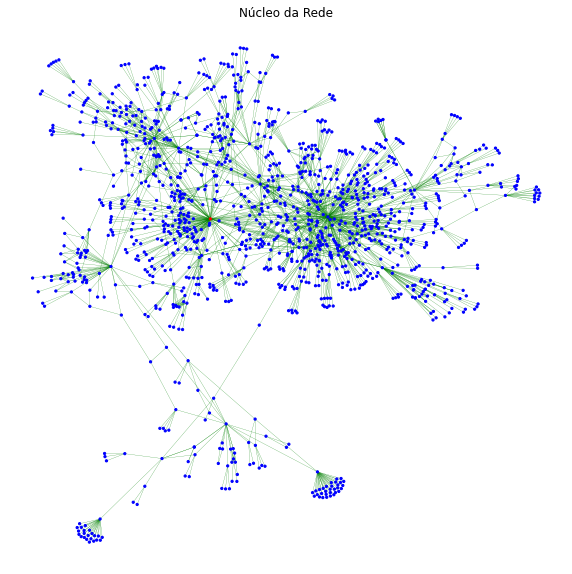

In [346]:
metricas_distribuicao(G)

#### Médidas de Centralidade

In [360]:
centralidade(G,tit)


Centralidade de Grau
O Nó Guest Editorial: Selected Papers From The 18Th Brazilian Symposium On Computer Graphics And Image Processing (Sibgrapi´2005) tem mínima centralidade (0.0011402508551881414)
O Nó Victor Hugo Costa De Albuquerque tem MÁXIMA centralidade (0.34728033472803344)

Centralidade de Proximidade
O Nó Assessing Agile Methods: An Empirical Study tem mínima centralidade (0.17819951338199513)
O Nó Victor Hugo Costa De Albuquerque tem MÁXIMA centralidade (0.48626253815961623)

Centralidade de Intermediação
O Nó Aplicações Gráficas Em Medicina: Técnicas E Modelos Realistas De Deformação tem mínima centralidade (0.0)
O Nó Victor Hugo Costa De Albuquerque tem MÁXIMA centralidade (0.5273670812430626)


#### Coeficiente de Agrupamento

In [301]:
 clustering_coef(G)


Coeficiente de Agrupamento
Coeficiente Geral: 0.3376211866990717
Coeficiente Nós Autores: 0.42849045214734005
Coeficiente Nós Títulos: 0.1709007980000532


In [309]:
fig = plt.figure(figsize=(15,10))
pos = nx.spring_layout(G)
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
edge_widths = normaliza(list(weights), (0.2,4))
edge_colors = normaliza(list(weights), (0.1,1))
nx.draw(G, pos, node_size=0.1, node_color='b', edgelist=edges,
        edge_color=edge_colors, width=edge_widths, edge_cmap=plt.cm.Greens, edge_vmin=-1, edge_vmax=1)

ValueError: not enough values to unpack (expected 2, got 0)

<Figure size 1080x720 with 0 Axes>

In [ ]:
list(nx.isolates(G))

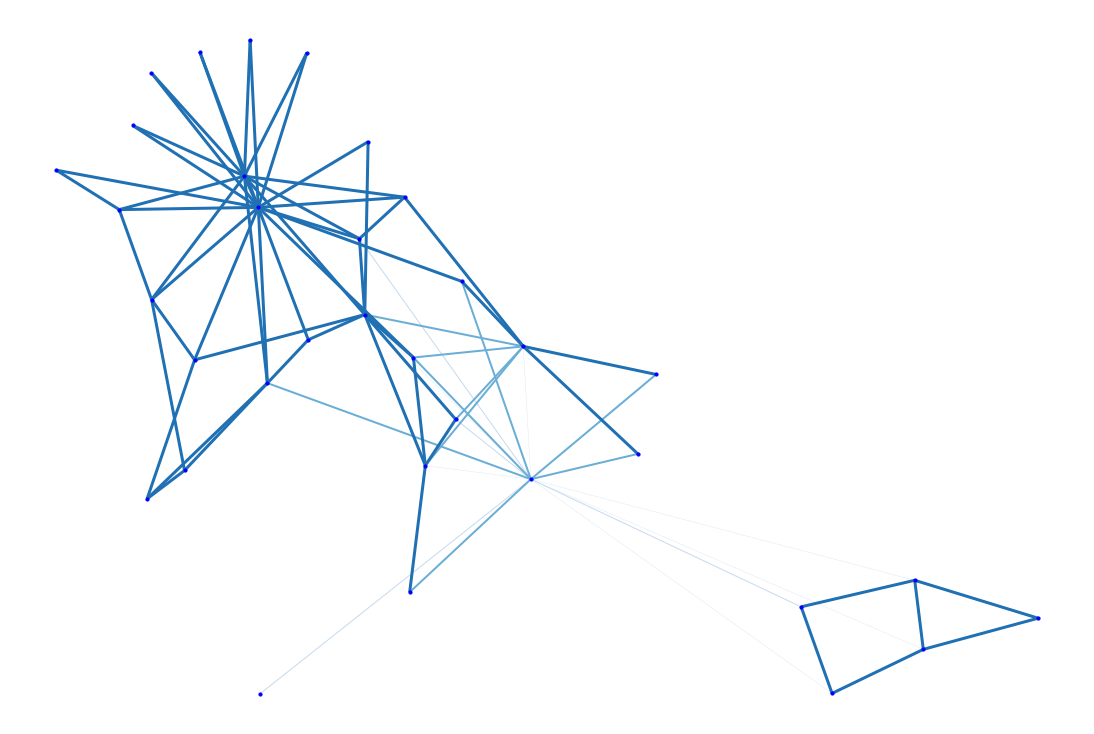

In [237]:
fig = plt.figure(figsize=(15,10))
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
edge_widths = normaliza(list(weights), (0.5,2))
edge_colors = normaliza(list(weights), (0.5,1))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=10, node_color='b', edgelist=edges, edge_color=weights, width=weights, edge_cmap=plt.cm.Blues, edge_vmin=0, edge_vmax=4)

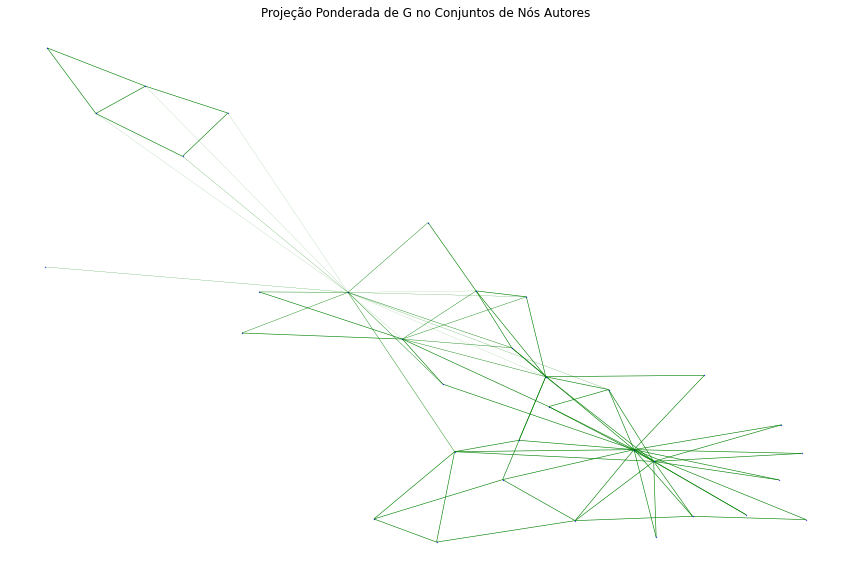

In [322]:
G = nx.karate_club_graph()
i=0
for e in G.edges():
    if i <= 5:
        peso = 0.5
    else:
        if i < 10:
            peso = 1
        else:
            if i < 20:
                peso = 2
            else:
                if peso < 30:
                    peso = 3
    G[e[0]][e[1]]['weight'] = peso
    i += 1
fig = plt.figure(figsize=(15,10))
plt.title('Projeção Ponderada de G no Conjuntos de Nós Autores')
pos = nx.spring_layout(G)
edge_widths = [round(w,2) for (*edge, w) in G.edges.data('weight')]
edge_widths = normaliza(edge_widths, (0.1,0.6))
nx.draw(G, pos, node_size=0.1, node_color='b', edge_color='g', width=edge_widths)

In [323]:
list(nx.isolates(G))

[]

In [324]:
list(nx.connected_components(G))

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33}]